In [1]:
from skimage import io
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
raw_mask = io.imread('./RNA/RNA.tissue_cut.tif')

In [3]:
tissue_mask = np.transpose(raw_mask)

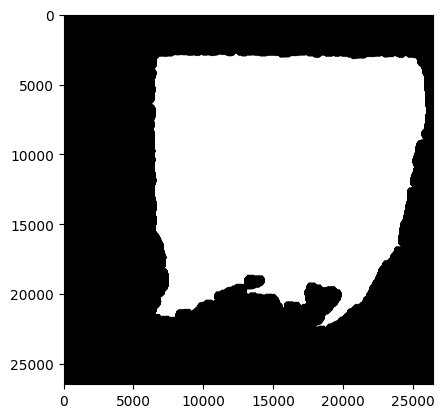

In [4]:
plt.imshow(tissue_mask, cmap='gray')

In [15]:
tissue_mask.shape

(26459, 26459)

In [16]:
np.sum(tissue_mask == 1)

306419494

In [17]:
np.sum(tissue_mask == 0)

393659187

In [18]:
# check whether mask is just a binay matrix
tissue_mask.shape[0] * tissue_mask.shape[1] -(np.sum(tissue_mask == 1) + np.sum(tissue_mask == 0))

0

In [20]:
# setup stereo-seq
chip_df = pd.read_csv('./RNA/RNA.raw.combine.gem', sep='\t',comment = '#')

In [22]:
chip_df.head()

,geneID,x,y,MIDCount,ExonCount
0,Gm1992,15244,8385,1,0
1,Gm1992,13665,24443,1,0
2,Gm1992,20889,18202,1,0
3,Gm37381,18336,12669,1,0
4,Gm37381,21477,16541,1,0


In [23]:
chip_df.shape

(121640676, 5)

In [24]:
# find non zero value in tissue_mask
rows, cols = np.where(tissue_mask == 1)

In [25]:
tissue_chip_df = chip_df.loc[(chip_df['x'].isin(rows)) & (chip_df['y'].isin(cols))]

In [26]:
tissue_chip_df.shape

(121350272, 5)

In [27]:
tissue_chip_df.to_csv('./RNA/RNA.tissue.combine.gem', sep='\t')